In [1]:
from covid import covid

In [2]:
from scipy.stats import linregress
import matplotlib.pyplot as plt
plt.rcParams['text.usetex']=True

In [3]:
frame = covid.get_entire_frame()

In [4]:
frame.reset_index(level=0, inplace=True)

In [5]:
frame.sort_values(by=frame.columns[-2], ascending=False, inplace=True)

In [6]:
frame

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20
29,China,548,643,920,1406,2075,2877,5509,6087,8141,...,80823,80860,80887,80921,80932,80945,80977,81003,81033,81058.0
73,Italy,0,0,0,0,0,0,0,0,0,...,7375,9172,10149,12462,12462,17660,21157,24747,27980,31506.0
69,Iran,0,0,0,0,0,0,0,0,0,...,6566,7161,8042,9000,10075,11364,12729,13938,14991,16169.0
135,Spain,0,0,0,0,0,0,0,0,0,...,673,1073,1695,2277,2277,5232,6391,7798,9942,11748.0
80,"Korea, South",1,1,2,2,3,4,4,4,4,...,7314,7478,7513,7755,7869,7979,8086,8162,8236,8320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Guadeloupe,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18.0
58,Guam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.0
94,Mayotte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
99,Montenegro,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0


In [7]:
countries = frame['Country/Region'][:12]

In [8]:
today = pandas.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-16-2020.csv')
today = today.groupby('Country/Region').sum()['Confirmed']

In [9]:
from palettable.tableau import Tableau_20_r

In [14]:
def plot_top_countries_cumulative():
    fig, ax = plt.subplots(dpi=300)
    ax.set_prop_cycle('color', Tableau_20_r.mpl_colors)
    previous = 0
    for i,country in enumerate(countries[1:10].tolist() + ['Canada'] + ['India'] + ['Australia'] + ['Singapore']+['Malaysia']):
        #print(i)
        timeseries = frame[frame['Country/Region'] == country].values.squeeze()[-13:][:].tolist() #+ [today[country]]
        #print(frame.columns[-13:-1][0])
        timeseries = numpy.array(timeseries)
        x = numpy.arange(len(timeseries))
        #print(x)
        #print(timeseries)
        ax.semilogy(x, timeseries, '.-', label=country)
        if country != 'Spain':
            ax.annotate('{} = {}'.format(country, timeseries[-1]),xy=(x[-1]+0.2,timeseries[-1]), fontsize=4)
        else:
            ax.annotate('{} = {}'.format(country, timeseries[-1]),xy=(x[-1]+0.2,timeseries[-1]-500), fontsize=4)
        previous = numpy.log(timeseries[-1])

    plt.legend(fontsize=4, bbox_to_anchor=(1.13, 0.80))
    plt.xlim(-0.5,14)
    plt.ylabel('Number of Cases')
    plt.xlabel('Days since March 04')
    plt.title('Updated case counts')
    plt.savefig('/Users/ugiri/coronavirus_analysis/plots/updated_cumlative_cases.pdf')

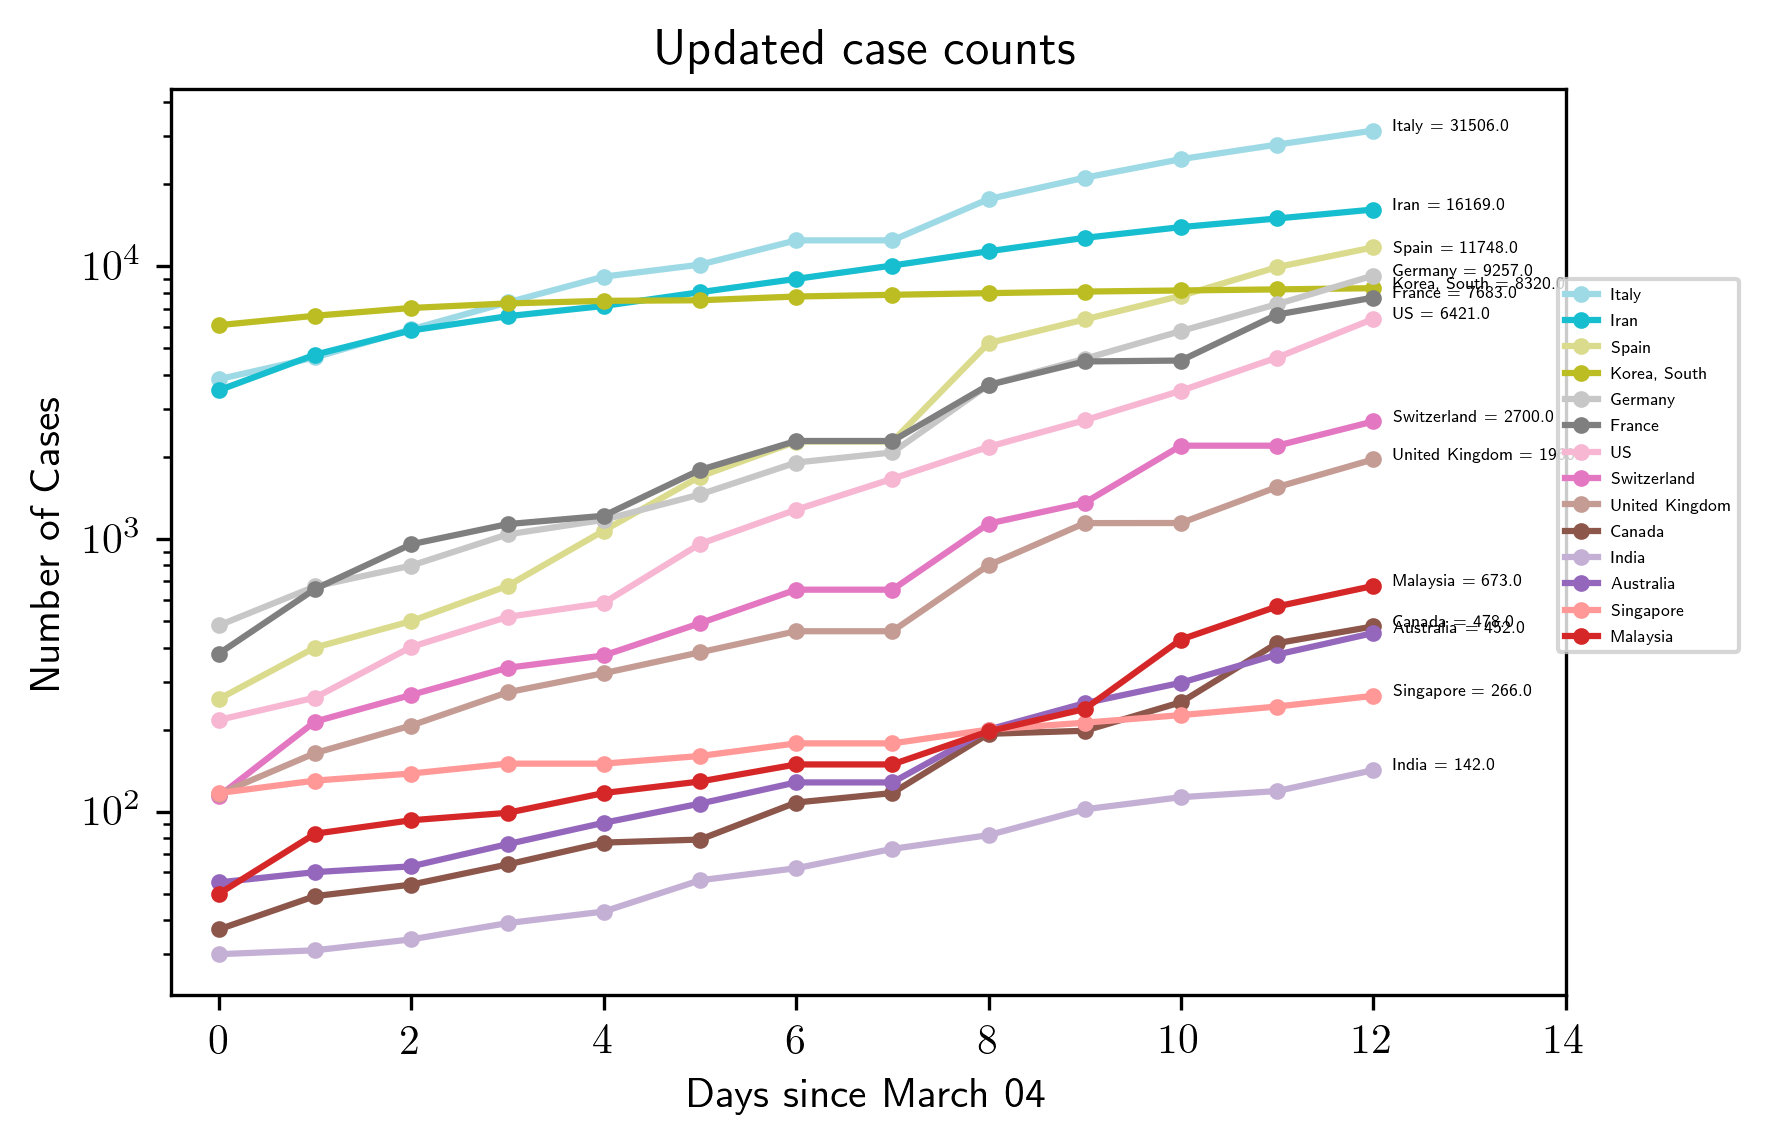

In [15]:
plot_top_countries_cumulative()

In [18]:
growth = []
for country in countries:
    array = numpy.array(frame[frame['Country/Region'] == country].transpose().iloc[-14:-1].values.squeeze(), dtype=float)
    array = numpy.array(array[-8:].tolist() + [today[country]])[:-2]
    slope, intercept, r, _, _ = linregress(numpy.arange(len(array)), numpy.log(array))
    print(country, r)
    growth.append(slope)

NameError: name 'today' is not defined

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

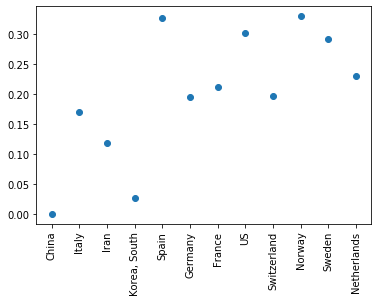

In [31]:
#plt.figure(dpi=200)
plt.plot(countries, growth, 'o')
plt.xticks(rotation=90)

In [32]:
frame[:45]

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
27,China,548,643,920,1406,2075,2877,5509,6087,8141,...,80537,80690,80770,80823,80860,80887,80921,80932,80945,80977
68,Italy,0,0,0,0,0,0,0,0,0,...,3858,4636,5883,7375,9172,10149,12462,12462,17660,21157
64,Iran,0,0,0,0,0,0,0,0,0,...,3513,4747,5823,6566,7161,8042,9000,10075,11364,12729
75,"Korea, South",1,1,2,2,3,4,4,4,4,...,6088,6593,7041,7314,7478,7513,7755,7869,7979,8086
123,Spain,0,0,0,0,0,0,0,0,0,...,259,400,500,673,1073,1695,2277,2277,5232,6391
50,Germany,0,0,0,0,0,1,4,4,4,...,482,670,799,1040,1176,1457,1908,2078,3675,4585
46,France,0,0,2,3,3,3,4,5,5,...,380,656,952,1129,1212,1787,2284,2284,3667,4480
135,US,1,1,2,2,5,5,5,5,5,...,217,262,402,518,583,959,1281,1663,2179,2727
128,Switzerland,0,0,0,0,0,0,0,0,0,...,114,214,268,337,374,491,652,652,1139,1359
98,Norway,0,0,0,0,0,0,0,0,0,...,87,108,147,176,205,400,598,702,996,1090
